### Estimar RL para outras frequências através de ML

### Tentativa 1

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ir para pasta Dados
local = os.getcwd()
os.chdir('./dados')


In [3]:
pwd

'/home/miguel/Apps/Data_Science_Python_GIT/06_RL_by_ML/dados'

Importar dados teóricos do VNA

In [4]:
#Pegar os arquivos
TXT =[arquivos for arquivos in os.listdir(local+'/dados') if arquivos[len(arquivos)-4:] == '.txt']

df = []

for txt in TXT:
    df.append(pd.read_csv(txt, sep= '\t', skipinitialspace = True))

In [5]:
df[3].max() # Valores Máximos

f(GHz)    12.39
e'         0.53
e"         1.04
u'         0.53
u"         1.04
tan_e     83.53
tan_u     83.53
RL        -0.11
RL_med    -3.20
Zin       56.75
S11        0.99
S21        0.35
A          0.95
R          0.98
T          0.12
SEt       22.35
SEr       17.11
SEa       22.14
SEmr      -0.00
dtype: float64

In [6]:
df[3].min() # Valores Mínimos

f(GHz)     8.20
e'        -0.52
e"         0.00
u'        -0.52
u"         0.00
tan_e    -13.97
tan_u    -13.97
RL       -37.12
RL_med    -3.20
Zin        0.33
S11        0.22
S21        0.06
A          0.02
R          0.05
T          0.00
SEt        8.64
SEr        0.21
SEa        5.72
SEmr      -2.63
dtype: float64

In [7]:
amostra = df[3] # Escolhe essa amostra por ter uma boa atenuação

In [8]:
amostra.head()

,f(GHz),e',"e""",u',"u""",tan_e,tan_u,RL,RL_med,Zin,S11,S21,A,R,T,SEt,SEr,SEa,SEmr
0,8.20,0.08,0.0,0.08,0.0,0.06,0.06,-0.13,-3.2,0.38,0.99,0.06,0.02,0.98,0.0,22.00,17.11,6.85,-1.96
1,8.21,0.08,0.0,0.08,0.0,0.06,0.06,-0.13,-3.2,0.39,0.99,0.06,0.02,0.98,0.0,21.92,17.04,6.85,-1.97
2,8.22,0.08,0.0,0.08,0.0,0.06,0.06,-0.13,-3.2,0.39,0.99,0.06,0.02,0.98,0.0,21.85,16.98,6.84,-1.97
3,8.23,0.08,0.0,0.08,0.0,0.06,0.06,-0.14,-3.2,0.40,0.99,0.06,0.02,0.98,0.0,21.77,16.91,6.83,-1.97
4,8.24,0.08,0.0,0.08,0.0,0.06,0.06,-0.14,-3.2,0.40,0.99,0.07,0.02,0.98,0.0,21.70,16.85,6.83,-1.98


In [9]:
"""X = amostra.drop(
    labels = ['RL','tan_e','tan_u'],
    axis = 1
)"""


X = amostra[["e'",'e"']] # Em vez de retirar cada elemento, optei por colocar... ganha tempo

y = amostra['RL']

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
"""tree = DecisionTreeClassifier(
    max_depth=2, # número de perguntas
    random_state=0,
)

tree.fit(X,y)"""#Não funciona, pois entende que os dados são contínuos....

'tree = DecisionTreeClassifier(\n    max_depth=2, # número de perguntas\n    random_state=0,\n)\n\ntree.fit(X,y)'

In [12]:
#tree.score(X,y)

### Tentativa 2 

Vou ter que mudar os dados para conseguir usar o DecisionTreeClassifier <br>
Terei de multiplicar tudo pro 100 para remover a vírgula e transformar em um inteiro depois

In [13]:
sample = df[3]


f =[]
e1 = []
e2 = []
u1 = []
u2 = []
RL =[]

dados ={
    'f':f,
    "e1":e1,
    'e2':e2,
    "u1":u1,
    'u2':u2,
    'RL':RL,
}

#Organizar o diciornário
for i in range(0,len(sample)):
    if i%11 == 0:#Pulas alguns dados, pois estão muito pŕoximos
        
        # Tive que transformar tudo em int para evitar o problema contínuo
        # e multipliquei por 100 para n arredondar pra zero
        dados['f'].append(int(100*sample['f(GHz)'][i]))
        dados["e1"].append(int(100*sample["e'"][i]))
        dados["e2"].append(int(100*sample['e"'][i]))
        dados["u1"].append(int(100*sample["u'"][i]))
        dados["u2"].append(int(100*sample['u"'][i]))
        dados['RL'].append(int(100*sample['RL'][i]))
    
#Tabela do Pandas
sample = pd.DataFrame(dados)

In [14]:
sample.head()

,f,e1,e2,u1,u2,RL
0,819,8,0,8,0,-13
1,831,8,1,8,1,-15
2,842,8,1,8,1,-17
3,852,9,1,9,1,-20
4,864,10,1,10,1,-24


In [15]:
X = sample.drop('RL',axis = 1)
y = sample[['RL']]


tree = DecisionTreeClassifier(
    max_depth=12, # número de perguntas
    random_state=0,
)

tree.fit(X,y)#Treinar

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
tree.score(X,y)

0.9743589743589743

In [17]:
y['pred_RL'] = tree.predict(X) #Adiciona uma predição dos dados de RL para os parâmetros já treinados
y['f'] = X[['f']] # Coloquei a coluna frequência para plotar mais tarde

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
dfy = pd.DataFrame(y)/100 # Tenho que dividir tudo novamente
dfy.head()

,RL,pred_RL,f
0,-0.13,-0.13,8.19
1,-0.15,-0.15,8.31
2,-0.17,-0.17,8.42
3,-0.20,-0.20,8.52
4,-0.24,-0.24,8.64


In [19]:
X = X/100 # novamente dividir por 100
X.head()

,f,e1,e2,u1,u2
0,8.19,0.08,0.00,0.08,0.00
1,8.31,0.08,0.01,0.08,0.01
2,8.42,0.08,0.01,0.08,0.01
3,8.52,0.09,0.01,0.09,0.01
4,8.64,0.10,0.01,0.10,0.01


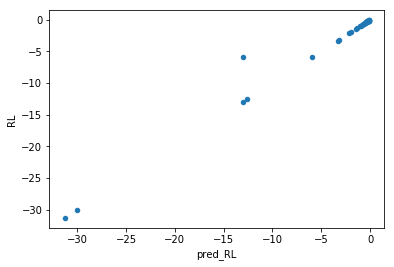

In [20]:
dfy.plot(x = 'pred_RL', y = 'RL',kind = 'scatter')

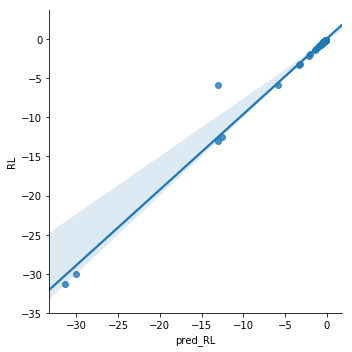

In [21]:
sns.lmplot(x = 'pred_RL',y = 'RL', data = dfy)

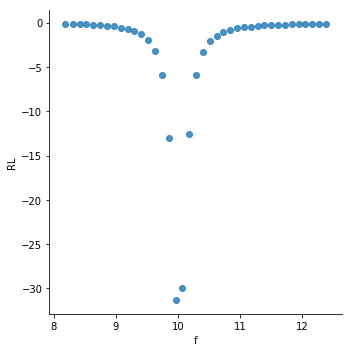

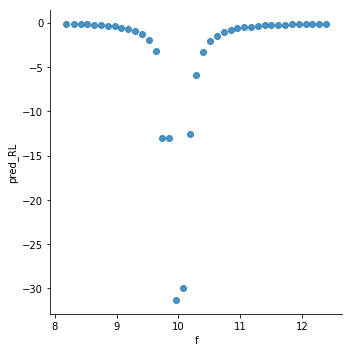

In [22]:
sns.lmplot(x = 'f',y = 'RL', data = dfy,fit_reg=False) # original
sns.lmplot(x = 'f',y = 'pred_RL', data = dfy,fit_reg=False) #Predição

### Variar a freq e manter e and u

para isso basta introduzirmos valores da banda-Ku (12.4-18GHz) na frequência dos dados X e mandar novamente fazer uma predição

In [23]:
# Fiz isso para não ter listas com tamanhos diferentes... se isso ocorrer não será possível
# adicionar a nova predição no dfy
xi =12.4 #fre inicial
xf = 18 # fre final
inter = (xf-xi)/len(dados['f']) # intervalo para que não exceda 

new_freq = np.arange(xi,xf,inter)


In [24]:
X['f'] =  new_freq #coloquei pra fazer os novos cálculos
dfy['f'] =  new_freq # coloquei pra plotar

X.head()

,f,e1,e2,u1,u2
0,12.400000,0.08,0.00,0.08,0.00
1,12.543590,0.08,0.01,0.08,0.01
2,12.687179,0.08,0.01,0.08,0.01
3,12.830769,0.09,0.01,0.09,0.01
4,12.974359,0.10,0.01,0.10,0.01


In [25]:
#Fazer nova predição, mas agora na banda-Ku
dfy['pred2_RL'] = tree.predict(X)

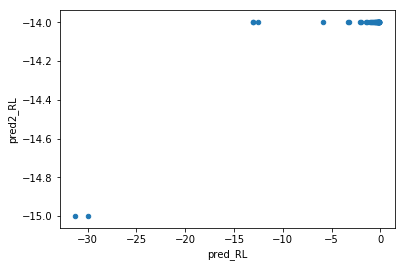

In [26]:
dfy.plot(x= 'pred_RL', y='pred2_RL', kind = 'scatter')
#Não faz sentido comparar ambos, pos pred está na banda X e pred2 banda Ku

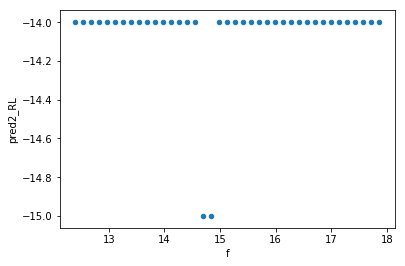

In [27]:
# Aqui está, uma predição da banda-Ku
dfy.plot(x = 'f', y = 'pred2_RL',kind = 'scatter')